In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import seaborn as sns

In [2]:
#Ob_set is the Obesity set of date. It has the obesity rates from 2004 - 2012 per county
#Lets load in the data toutilize it further
#"number yyyy" is the percentage of obese idividuals based on the surverys done each year for the entire county
Obset = pd.read_excel("OB_PREV_ALL_STATES.xlsx", "obesity")

In [3]:
#Remove all the extra data in the Obesity list to leave just the numbers and % obese per county
for col in Obset.columns[4:]:
    if 'number' not in col and 'percent' not in col or 'age' in col:
        del Obset[col]

In [4]:
FoodAccess = pd.read_excel("FoodSecAllup.xls", 'ACCESS')

In [5]:
#Merge the 2 data sets together
Obset = pd.merge(Obset, FoodAccess, how='left', left_on='FIPS Codes',right_on ='FIPS',left_index=True, right_index=True, sort=True, copy=True)

In [16]:
#looks like we have some NaN values so lets delete those rose so they dont skew the data
#Obset[['percent 2010','PCT_LACCESS_POP10','PCT_LACCESS_LOWI10','PCT_LACCESS_CHILD10','PCT_LACCESS_SENIORS10','PCT_LACCESS_HHNV10']] = Obset[['percent 2010','PCT_LACCESS_POP10','PCT_LACCESS_LOWI10','PCT_LACCESS_CHILD10','PCT_LACCESS_SENIORS10','PCT_LACCESS_HHNV10']].fillna(int(0))
Obset = Obset[['percent 2010','PCT_LACCESS_POP10','PCT_LACCESS_LOWI10','PCT_LACCESS_CHILD10','PCT_LACCESS_SENIORS10','PCT_LACCESS_HHNV10']].dropna(how='any')`

C:\Users\ahellman\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


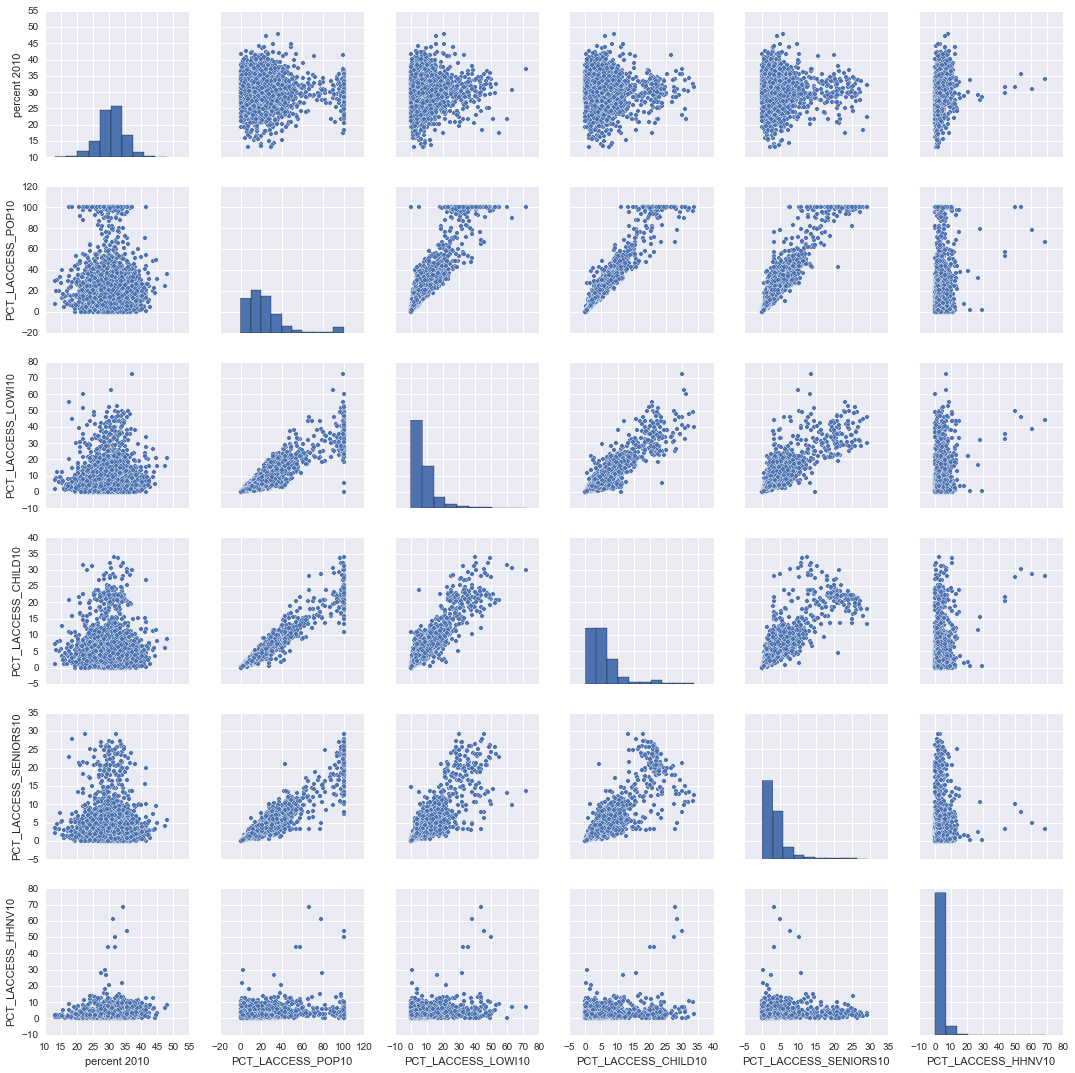

In [18]:
#see if the pairplot shows us anything 
sns.pairplot(Obset, size=2.5,vars=Obset[['percent 2010','PCT_LACCESS_POP10','PCT_LACCESS_LOWI10','PCT_LACCESS_CHILD10','PCT_LACCESS_SENIORS10','PCT_LACCESS_HHNV10']])

In [17]:
Obset[['percent 2010','PCT_LACCESS_POP10','PCT_LACCESS_LOWI10','PCT_LACCESS_CHILD10','PCT_LACCESS_SENIORS10','PCT_LACCESS_HHNV10']].describe()

,percent 2010,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10
count,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000,3104.000000
mean,30.573550,23.565613,8.398922,5.508038,3.920669,3.171644
std,4.243605,20.316126,8.247804,4.895173,4.235047,3.220943
min,13.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.400000,10.750915,3.442380,2.384866,1.576269,1.624805
50%,30.700000,19.632762,6.156378,4.449702,2.820738,2.578893
75%,33.200000,29.585440,10.366671,6.973606,4.527053,3.816298
max,47.900000,100.000001,72.274456,34.015595,29.208633,68.470405


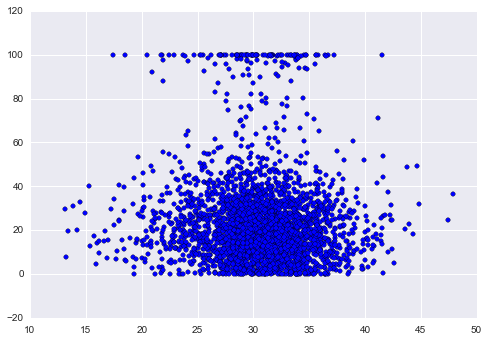

In [19]:
import matplotlib.pyplot as pltFMOb
pltFMOb.scatter(Obset['percent 2010'], Obset['PCT_LACCESS_POP10'], label="training points")

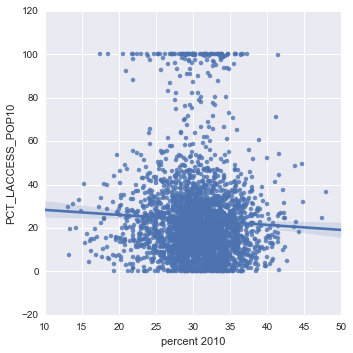

In [20]:
sns.lmplot("percent 2010", 'PCT_LACCESS_POP10', Obset);